In [5]:
# importing experiment data
import numpy as np
import pandas as pd
import ast
import math
import matplotlib.pyplot as plt
from scipy.stats import variation

# og_df = pd.read_csv(r'/home/rubi/Desktop/Action Control Lab/python_scripts/munashe_macbookpro_2_typingtask_2021_Jul_21_0950.csv')
# og_df = pd.read_csv(r'/Users/rubi/Desktop/Action Control Lab/typing_task_analysis/rubi3_typingtask_2020_Nov_30_0949.csv')
og_df = pd.read_csv(r'/Users/rubi/Desktop/Action Control Lab/typing_task_analysis/Ian_w_video_typingtask_2020_Dec_02_2137.csv')
## will need to edit path for different computers and files

In [14]:
### EDIT FOR ANY TRIALS YOU WANT TO IMMEDIATELY EXCLUDE ###

## deleting last row with no keypress data
df = og_df.drop(labels=len(og_df)-1, axis=0) ## finds last row, no matter the length of the actual data set

In [15]:
## list of all strings
all_strings = ['there', 'about', 'right', 'think', 'would', 'where', 
          'loyal', 'wagon', 'merry', 'motel', 'crawl', 'motor',
          'unhat', 'wooer', 'yeses', 'crape', 'incan', 'noire',
          'lumpo', 'reshy', 'blong', 'kremp', 'wovet', 'zarsh']

## string groupings by word frequency (WF)
mostfam = ['there', 'about', 'right', 'think', 'would', 'where']
semifam = ['loyal', 'wagon', 'merry', 'motel', 'crawl', 'motor']
unfam = ['unhat', 'wooer', 'yeses', 'crape', 'incan', 'noire']
nofam = ['lumpo', 'reshy', 'blong', 'kremp', 'wovet', 'zarsh']

## list of string groupings
str_types = [mostfam, semifam, unfam, nofam]

In [16]:
## expanding nested key_resp.rt values into separate columns, making new dataframe, and turning values back into floats from strings
stripped_rts = df['key_resp.rt'].str.strip('[,]')
rts_intocolumns = stripped_rts.str.split(',', expand = True)

## renames rt columns to automatically match dataset
DF = rts_intocolumns
renamed_rt = DF.rename(columns = { 0:'key_resp.rt.%s' %(0+1) })
for n in range(0, len(DF.columns)):
    renamed_rt = renamed_rt.rename(columns = { n:'key_resp.rt.%s' %(n+1) })
expanded_rts = renamed_rt.astype(float).fillna(0) ##replacing NaNs with zeroes

In [18]:
## expanding nested key_resp.keys values into separate columns and making new dataframe
stripped_keys = df['key_resp.keys'].str.strip('[,]')
keys_intocolumns = stripped_keys.str.split(',', expand = True)

## renames key columns to automatically match dataset
DF = keys_intocolumns
expanded_keys = DF.rename(columns = { 0:'key_resp.keys.%s' %(0+1) })
for n in range(0, len(DF.columns)):
    expanded_keys = expanded_keys.rename(columns = { n:'key_resp.keys.%s' %(n+1) })
    
## getting rid of apostrophes and spaces in key values
cols_to_change = (expanded_keys.iloc[:, 0:])
for col in cols_to_change:
    expanded_keys[col] = expanded_keys[col].str.replace("'", "")
    expanded_keys[col] = expanded_keys[col].str.replace(" ", "")

In [19]:
## combining key_resp.keys into one simple string to easily represent typed responses
responses = pd.DataFrame(df['key_resp.keys'].str.replace("[', ]", "").str.strip("[]")).rename(columns = {'key_resp.keys':'resp_string'})

<ipython-input-19-698dde19e564>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  responses = pd.DataFrame(df['key_resp.keys'].str.replace("[', ]", "").str.strip("[]")).rename(columns = {'key_resp.keys':'resp_string'})


In [20]:
## combining expanded rt, expanded key, and response string values back into main dataframe
full_df = pd.concat([df, expanded_rts, expanded_keys, responses], axis = 1)
### NOTE: useful for displaying entire dataframe
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can also be specified
#     print(full_df)

In [21]:
## combining expanded rt, expanded key. and response string values with column for strings typed each trial to create more useful dataframe
            ## (does not have all the random timing data of other events occuring during the task)
main_df = pd.concat([expanded_rts, expanded_keys, responses], axis = 1)
main_df.insert(0, 'string', df['string'], True)

## creating column for WF type for each trial
main_df['WF Type'] = ""
for index, data in main_df.iterrows():
    if main_df.loc[index, 'string'] in mostfam:
        main_df.loc[index, 'WF Type'] = 'mostfam'
    if main_df.loc[index, 'string'] in semifam:
        main_df.loc[index, 'WF Type'] = 'semifam'
    if main_df.loc[index, 'string'] in unfam:
        main_df.loc[index, 'WF Type'] = 'unfam'
    if main_df.loc[index, 'string'] in nofam:
        main_df.loc[index, 'WF Type'] = 'nofam'

### WIP ###
## creating column for BF type for each trial

main_df
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can also be specified
#     print(main_df)

,string,key_resp.rt.1,key_resp.rt.2,key_resp.rt.3,key_resp.rt.4,key_resp.rt.5,key_resp.rt.6,key_resp.keys.1,key_resp.keys.2,key_resp.keys.3,key_resp.keys.4,key_resp.keys.5,key_resp.keys.6,resp_string,WF Type
0,kremp,0.786775,0.926572,1.010776,1.224758,1.344751,0.0,k,r,e,m,p,None,kremp,nofam
1,incan,0.657873,0.728534,0.869650,0.965733,1.099044,0.0,i,n,c,a,n,None,incan,unfam
2,crape,0.670971,0.858475,0.958379,1.151292,1.251202,0.0,c,r,a,p,e,None,crape,unfam
3,motel,0.628949,0.732016,0.860981,0.957059,1.064914,0.0,m,o,t,e,l,None,motel,semifam
4,lumpo,0.686458,0.809780,1.053541,1.209717,1.345577,0.0,l,u,m,p,o,None,lumpo,nofam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,incan,0.549112,0.629064,0.768721,0.840827,0.972863,0.0,i,n,c,a,n,None,incan,unfam
235,wooer,0.550099,0.670366,0.834088,0.910237,0.978257,0.0,w,o,o,e,r,None,wooer,unfam
236,wovet,0.531584,0.660664,0.759279,0.927354,1.003475,0.0,w,o,v,e,t,None,wovet,nofam
237,yeses,0.722938,0.846945,0.950732,1.140114,1.255911,0.0,y,e,s,e,s,None,yeses,unfam


In [9]:
## defining function to make dataframe of only correct trials
def correct_filter(DF):
    corr_temp = []
    for index, data in DF.iterrows():
        if data['string'] == data['resp_string']: ## compares presented string with typed response
            corr_temp.append(DF.iloc[index])
    corr = pd.DataFrame(corr_temp).reset_index(drop=True)
    return corr

corr_trials = correct_filter(main_df)

## defining function to make dataframe of only incorrect trials
def incorrect_filter(DF):
    incorr_temp = []
    for index, data in DF.iterrows():
        if data['string'] != data['resp_string']: ## compares presented string with typed response
            incorr_temp.append(DF.iloc[index])
    incorr = pd.DataFrame(incorr_temp).reset_index(drop=True)
    return incorr

incorr_trials = incorrect_filter(main_df)

In [10]:
## making dataframe only of rts from correct trials
corr_rts = pd.DataFrame(corr_trials.iloc[:, 0:6])

## making dataframe only of rts from incorrect trials
incorr_rts = pd.DataFrame(incorr_trials.iloc[:, 0:6])

In [11]:
## making filtered dataframes by word frequency
mostfam_df = full_df[full_df['string'].isin(mostfam)]
semifam_df = full_df[full_df['string'].isin(semifam)]
unfam_df = full_df[full_df['string'].isin(unfam)]
nofam_df = full_df[full_df['string'].isin(nofam)]

In [12]:
## defining function for calculating onset delays for different WF categories
def onset_delay(DF):
    return DF['key_resp.rt.1']

## defining function for calculating average onset delay for different WF categories
def avg_onset_delay(DF):
    return np.mean(DF['key_resp.rt.1'])

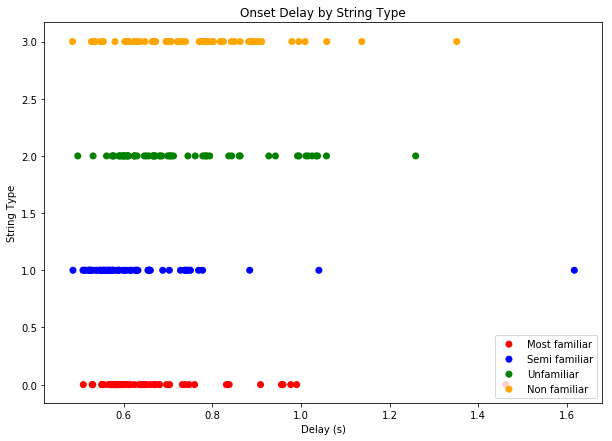

In [13]:
## plotting onset delay as scatter plot
plt.figure(figsize=(10, 7))
mostfam_scatter = plt.scatter(onset_delay(mostfam_df), [0] * len(onset_delay(mostfam_df)), c=['red'] * len(onset_delay(mostfam_df)), label='Most familiar')
semifam_scatter = plt.scatter((onset_delay(semifam_df)), [1] * len(onset_delay(semifam_df)), c=['blue'] * len(onset_delay(semifam_df)), label='Semi familiar')
unfam_scatter = plt.scatter((onset_delay(unfam_df)), [2] * len(onset_delay(unfam_df)), c=['green'] * len(onset_delay(unfam_df)), label='Unfamiliar')
nofam_scatter = plt.scatter((onset_delay(nofam_df)), [3] * len(onset_delay(nofam_df)), c=['orange'] * len(onset_delay(nofam_df)), label='Non familiar')

plt.xlabel("Delay (s)")
plt.ylabel("String Type")
plt.title("Onset Delay by String Type")
plt.legend(loc = "lower right")

plt.show()

Text(0.5, 1.0, 'Onset Delay by String Type')

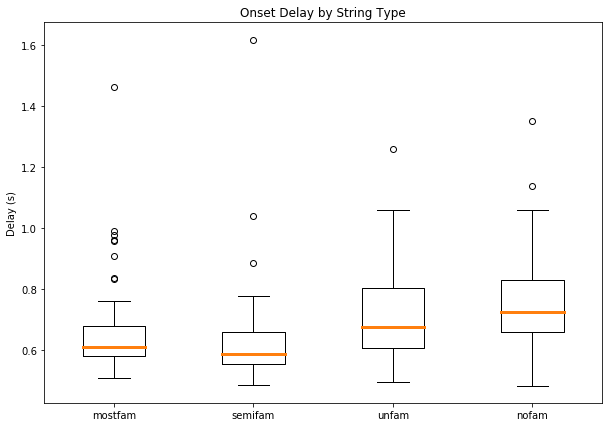

In [14]:
## plotting onset delay as box and whisker
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([ onset_delay(mostfam_df), onset_delay(semifam_df), onset_delay(unfam_df), onset_delay(nofam_df)])

colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF']

ax.set_xticklabels(['mostfam', 'semifam',
                    'unfam', 'nofam'])
for median in bp['medians']:
    median.set(linewidth = 3)

plt.xlabel("")
plt.ylabel("Delay (s)")
plt.title("Onset Delay by String Type")

In [15]:
## inserting column containing the string typed during each trial to the dataframe of expanded reaction times
expanded_rts.insert(0, 'string', df['string'], True)

In [16]:
## making filtered dataframes by word frequency -- only includes key rts (reaction times)
mostfam_rts = (expanded_rts[expanded_rts['string'].isin(mostfam)]).reset_index(drop=True)
semifam_rts = (expanded_rts[expanded_rts['string'].isin(semifam)]).reset_index(drop=True)
unfam_rts = (expanded_rts[expanded_rts['string'].isin(unfam)]).reset_index(drop=True)
nofam_rts = (expanded_rts[expanded_rts['string'].isin(nofam)]).reset_index(drop=True)

In [17]:
## defining function to determine time spent typing each trial (effectively speed)
def time_typing(DF):
    speeds = []
    key_1 = len(DF.columns)
    for index, data in DF.iterrows():
        for n in range(-1, -(key_1), -1):
            if DF.iloc[index, n] != 0: ## finds last rt value that isn't zero, so typing time is not a negative number
                speed = (DF.iloc[index, n]) - (DF.iloc[index, 1])
                speeds.append(speed)
                break
    return speeds

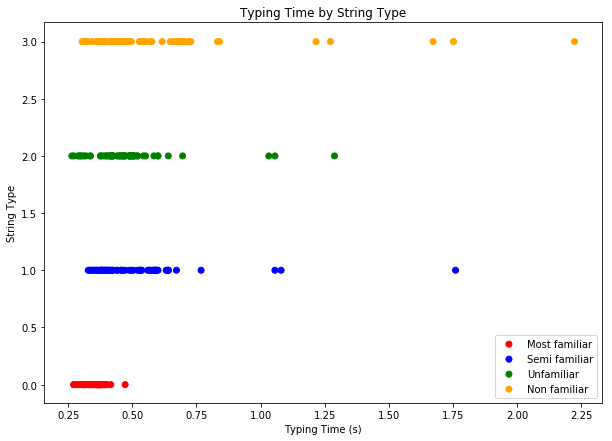

In [18]:
## plotting scatter plot of typing time with legend
plt.figure(figsize=(10, 7))
mostfam_scatter = plt.scatter(time_typing(mostfam_rts), [0] * len(time_typing(mostfam_rts)), c=['red'] * len(time_typing(mostfam_rts)), label='Most familiar')
semifam_scatter = plt.scatter(time_typing(semifam_rts), [1] * len(time_typing(semifam_rts)), c=['blue'] * len(time_typing(semifam_rts)), label='Semi familiar')
unfam_scatter = plt.scatter(time_typing(unfam_rts), [2] * len(time_typing(unfam_rts)), c=['green'] * len(time_typing(unfam_rts)), label='Unfamiliar')
nofam_scatter = plt.scatter(time_typing(nofam_rts), [3] * len(time_typing(nofam_rts)), c=['orange'] * len(time_typing(nofam_rts)), label='Non familiar')

plt.xlabel("Typing Time (s)")
plt.ylabel("String Type")
plt.title("Typing Time by String Type")
plt.legend(loc= "lower right")

plt.show()

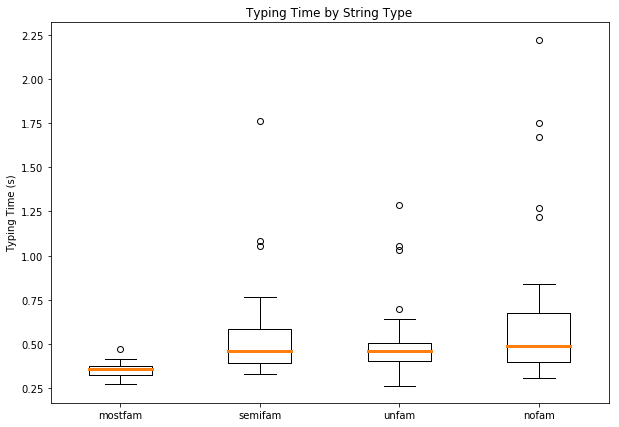

In [19]:
## plotting typing time as box and whisker
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([ time_typing(mostfam_rts), time_typing(semifam_rts), time_typing(unfam_rts), time_typing(nofam_rts)])

colors = ['#0000FF', '#00FF00','#FFFF00', '#FF00FF']

ax.set_xticklabels(['mostfam', 'semifam',
                    'unfam', 'nofam'])
for median in bp['medians']:
    median.set(linewidth = 3)
    
plt.xlabel("")
plt.ylabel("Typing Time (s)")
plt.title("Typing Time by String Type")

plt.show()

In [20]:
### For all these functions, the dataframe variable (DF) needs to be a reaction time DF with associated strings in column 1 
###(ex. expanded_rts, corr_rts, incorr_rts)

## defining function to determine interkey intervals for each trial
def iki(DF):
    ints_byword = []
    last_key = len(DF.columns) - 1   
    for index, data in DF.iterrows():
        intervals = []
        for n in range(1, last_key):
            interval = (DF.iloc[index, n + 1]) - (DF.iloc[index, n])
            intervals.append(interval)
        ints_byword.append(intervals)
    all_ints = pd.DataFrame(ints_byword)
    all_ints[all_ints < 0] = 0  ## making all negative values in initial output 0
    all_ints.insert(0, 'string', DF['string'], True) ## adding in column containing the string typed each trial
    return all_ints

## defining function to determine coefficient of variation (CV) across interkey intervals (IKIs) for trials with the same word
def cv_byword(string, DF):
    arr = iki(DF)
    sort_byword = []
    for index, data in arr.iterrows():
        if DF['string'][index] == string:
            sort_byword.append(data)
    iki_byword = pd.DataFrame(sort_byword)
    temp = iki_byword.drop(['string'], axis=1) ## temporatily dropping 'string' column to calculate CV across columns
    iki_cv = (variation(temp, axis=0)).tolist()
    iki_cv.insert(0, string)
    return iki_cv
    
## defining function to make dataframe of all IKI-CVs by word
def cv_all(str_type, DF):
    cvs = []
    for x in str_type:
        y = cv_byword(x, DF)
        cvs.append(y)
    all_cvs = (pd.DataFrame(cvs)).dropna(axis=1) ## dropping columns with NaNs -- IKI-CVs of additive errors, not necessary to analyze
    return all_cvs

## defining function to determine average IKI-CV by word freq. type
def avg_cv(DF):
    avgs = []
    last_row = len(DF.columns)
    for n in range(1, last_row):
        y = DF[n].mean()
        avgs.append(y)
    return avgs

/home/rubi/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1144: RuntimeWarning: invalid value encountered in true_divide
  return a.std(axis) / a.mean(axis)


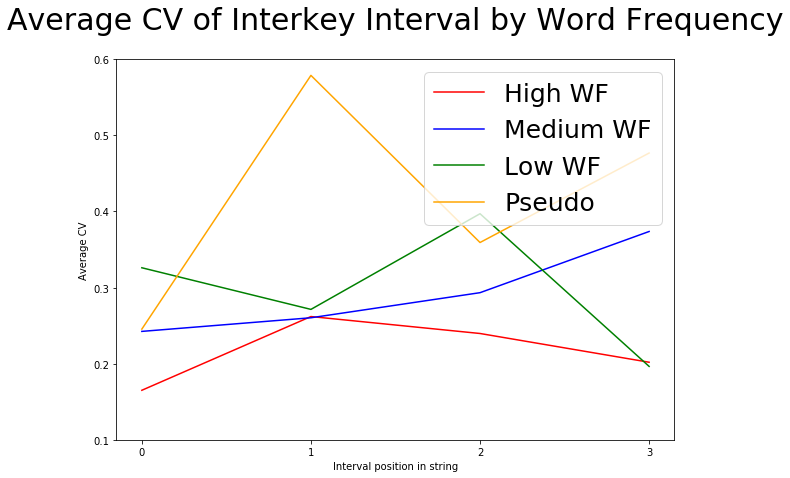

In [21]:
## plotting digraph latency variations with legend (includes error trials)
## NOTE: run twice for tick marks / label sizes to update -- dunno why
plt.figure(figsize=(10, 7))
x = [0, 1, 2, 3]
mostfam_plot = plt.plot(avg_cv(cv_all(mostfam, expanded_rts)), color='red', label='High WF')
semifam_plot = plt.plot(avg_cv(cv_all(semifam, expanded_rts)), color='blue', label='Medium WF')
unfam_plot = plt.plot(avg_cv(cv_all(unfam, expanded_rts)), color='green', label='Low WF')
nofam_plot = plt.plot(avg_cv(cv_all(nofam, expanded_rts)), color='orange', label='Pseudo')

## Set general font size
plt.rcParams['font.size'] = '25'

## Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(25)

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Interval position in string")
plt.ylabel("Average CV")
plt.ylim([0.1, 0.6])
plt.title("Average CV of Interkey Interval by Word Frequency", pad=30)
plt.legend(loc="upper right")

plt.savefig('ian_iki.png')

plt.show()

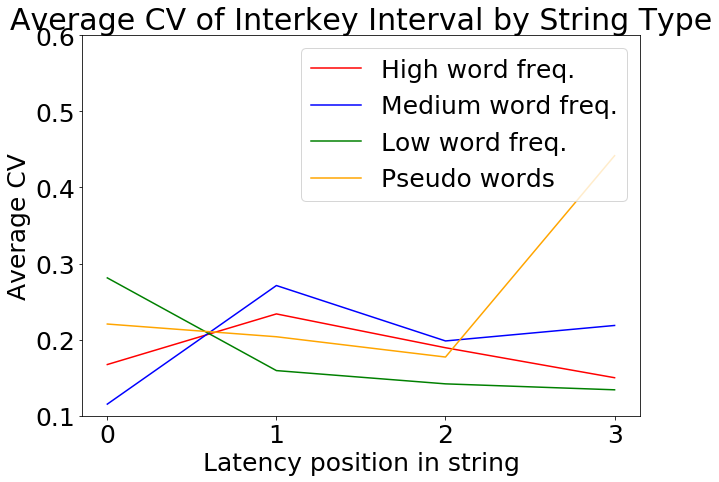

In [22]:
## plotting digraph latency variations with legend (does not include error trials)
plt.figure(figsize=(10, 7))
x = [0, 1, 2, 3]
mostfam_plot = plt.plot(avg_cv(cv_all(mostfam, corr_rts)), color='red', label='High word freq.')
semifam_plot = plt.plot(avg_cv(cv_all(semifam, corr_rts)), color='blue', label='Medium word freq.')
unfam_plot = plt.plot(avg_cv(cv_all(unfam, corr_rts)), color='green', label='Low word freq.')
nofam_plot = plt.plot(avg_cv(cv_all(nofam, corr_rts)), color='orange', label='Pseudo words')


plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Latency position in string")
plt.ylabel("Average CV")
plt.ylim([0.1, 0.6])
plt.title("Average CV of Interkey Interval by String Type")
plt.legend(loc="upper right")

plt.show()

In [23]:
## defining function to determine delta IKIs by word
def diki(string, DF):
    all_ikis = iki(DF)
    sort_byword = []
    for index, data in all_ikis.iterrows():
            if all_ikis['string'][index] == string:
                sort_byword.append(data)
    iki_byword = pd.DataFrame(sort_byword)
    iki_byword.reset_index(drop=True, inplace=True)
    last_key = len(iki_byword.columns)
    trial_count = len(iki_byword)
    dikis_byword = []
    for index in range(0, trial_count - 1):
        dikis = []
        for n in range(1, last_key):
            diki = abs((iki_byword.iloc[index + 1, n]) - (iki_byword.iloc[index, n])) # solves for delta IKI and makes value absolute
            dikis.append(diki)
        dikis_byword.append(dikis)
    dikis_byword = pd.DataFrame(dikis_byword)
# make a list of row titles (inter-repetition position)
    row_titles = []
    for n in range(1, trial_count):
        y = '%s-%s' %(n, n+1)
        row_titles.append(y)
    dikis_byword.insert(0, 'inter-rep', row_titles)
    return dikis_byword

## defining function to determine average of all delta IKIs within word
def avg_diki_byword(string, DF):
    dikis_byword = diki(string, DF)
    avgs = []
    last_row = len(dikis_byword.columns)
    dikis_byword['mean'] = dikis_byword.mean(axis=1)
    meandiki_bypos = dikis_byword['mean']
    return meandiki_bypos

## defining function to determine the average delta IKI by word type -- average of average delta IKI per word
def avg_diki_byWF(str_type, DF):
    allword_dikis = pd.DataFrame()
    for string in str_type:
            dikis_byword = diki(string, DF)
            dikis_byword_df = pd.DataFrame(dikis_byword)
#             print(dikis_byword_df)
            allword_dikis = allword_dikis.append(dikis_byword_df)
    allword_dikis = allword_dikis.reset_index(drop=True)
# get average of word-specific delta IKI averages for each inter-repetition position
    avgiki_bypos = []
    for n in range(1, 10):
        iki_bypos = pd.DataFrame()
        for index, data in allword_dikis.iterrows():
            if allword_dikis['inter-rep'][index] == '%s-%s' %(n, n+1):
                temp = allword_dikis.iloc[index]
#                 print(temp)
                iki_bypos = iki_bypos.append(temp)
        iki_bypos['mean'] = iki_bypos.mean(axis=1)
#         print(iki_bypos)
        double_mean = iki_bypos['mean'].mean()
        avgiki_bypos.append(double_mean)
    return avgiki_bypos

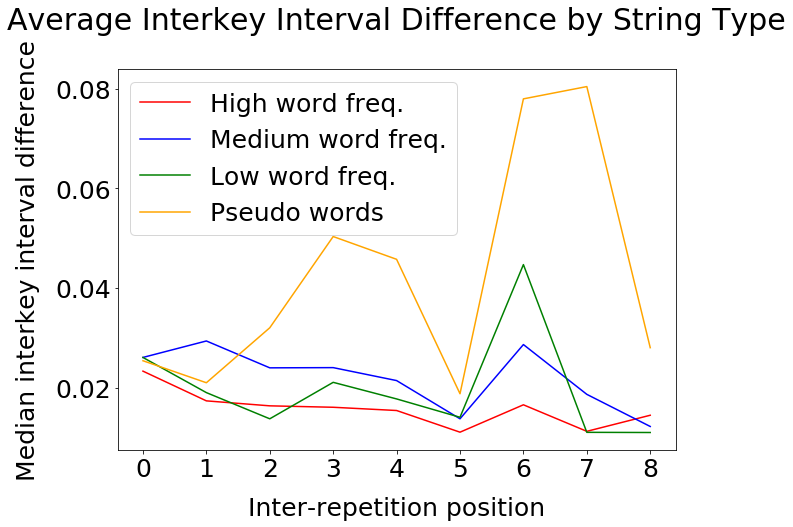

In [24]:
## plotting average delta IKI by WF type (only for correct trials)

plt.figure(figsize=(10, 7))
x = [0, 1, 2, 3, 4, 5, 6, 7, 8]
mostfam_plot = plt.plot((avg_diki_byWF(mostfam, corr_rts)), color='red', label='High word freq.')
semifam_plot = plt.plot((avg_diki_byWF(semifam, corr_rts)), color='blue', label='Medium word freq.')
unfam_plot = plt.plot((avg_diki_byWF(unfam, corr_rts)), color='green', label='Low word freq.')
nofam_plot = plt.plot((avg_diki_byWF(nofam, corr_rts)), color='orange', label='Pseudo words')


plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Inter-repetition position", labelpad=15)
plt.ylabel("Median interkey interval difference", labelpad=15)
# plt.ylim([0.1, 0.6])
plt.title("Average Interkey Interval Difference by String Type", pad=40)
plt.legend(loc="upper left")

plt.show()

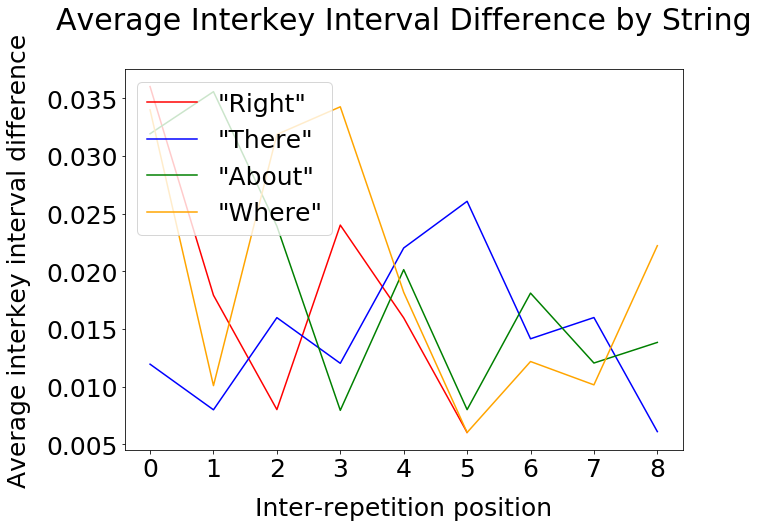

In [25]:
## plotting average delta IKI by WF type (only for correct trials)

plt.figure(figsize=(10, 7))
x = [0, 1, 2, 3, 4, 5, 6, 7, 8]
mostfam_plot = plt.plot((avg_diki_byword('right', corr_rts)), color='red', label='"Right"')
semifam_plot = plt.plot((avg_diki_byword('there', corr_rts)), color='blue', label='"There"')
unfam_plot = plt.plot((avg_diki_byword('about', corr_rts)), color='green', label='"About"')
nofam_plot = plt.plot((avg_diki_byword('where', corr_rts)), color='orange', label='"Where"')


plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Inter-repetition position", labelpad=15)
plt.ylabel("Average interkey interval difference", labelpad=15)
# plt.ylim([0.1, 0.6])
plt.title("Average Interkey Interval Difference by String", pad=40)
plt.legend(loc="upper left")

plt.show()

In [26]:
## To-Do:
## total number of errors by string type
## total number of errors by string -
## edit distance by string type
## variation of IKI for same bigram across different words and word types

In [27]:
# bar chart for error by word
plt.figure(figsize=(15, 7))
plt.bar(plot_labels, plot_values, color=plot_colors,
        width=0.4)

plt.xlabel("")
plt.ylabel("Total No. of errors")
plt.title("Errors by String")
plt.show()

NameError: name 'plot_labels' is not defined

<Figure size 1080x504 with 0 Axes>